오터인코더는 데이터가 충분하지 않을 때 데이터의 전반적인 특징을 유추하기에 적합한 기법이다.

입력층과 출력층의 node 개수가 같고, 그 사이 은닉층에서는 차원을 줄여준다.

은닉층에서 데이터 복원을 위해 학습을 시작하고, 이 과정에서 특징이 응축된 새로운 출력이 나온다.

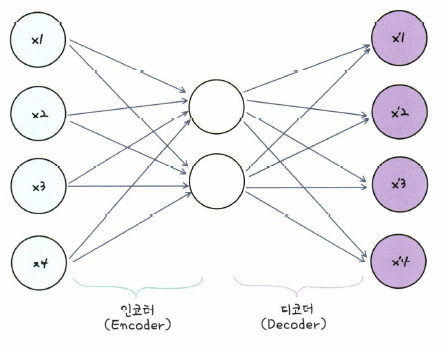

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np

#MNIST데이터 셋을 불러옵니다.
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

#생성자 모델을 만듭니다.
autoencoder = Sequential()

# 인코딩 부분입니다. 차원을 축소시키는 layer입니다.
# MaxPooling을 이용해서 입력크기를 줄입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분이 이어집니다. 차원을 키우는 layer입니다.
# UpSampling을 이용해서 입력크기를 키웁니다.
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()

# Model: "sequential"
# _________________________________________________________________
# Layer (type)                 Output Shape              Param #   
# =================================================================
# conv2d (Conv2D)              (None, 28, 28, 16)        160       
# _________________________________________________________________
# max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
# _________________________________________________________________
# conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
# _________________________________________________________________
# max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
# _________________________________________________________________
# conv2d_2 (Conv2D)            (None, 4, 4, 8)           584    <-- MaxPooling은 2로 나눠야하는데, 그럴 수가 없어서 padding으로 8*8로 만들어 준 뒤 나눠서 4를 구한다.   
# _________________________________________________________________
# conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
# _________________________________________________________________
# up_sampling2d (UpSampling2D) (None, 8, 8, 8)           0         
# _________________________________________________________________
# conv2d_4 (Conv2D)            (None, 8, 8, 8)           584       
# _________________________________________________________________
# up_sampling2d_1 (UpSampling2 (None, 16, 16, 8)         0      
# _________________________________________________________________
# conv2d_5 (Conv2D)            (None, 14, 14, 16)        1168  <-- 오히려 벡터의 크기가 줄었는데, 이는 여기서 padding이 적용되지 않았기 때문이다.     
# _________________________________________________________________
# up_sampling2d_2 (UpSampling2 (None, 28, 28, 16)        0         
# _________________________________________________________________
# conv2d_6 (Conv2D)            (None, 28, 28, 1)         145       
# =================================================================
# Total params: 4,385
# Trainable params: 4,385
# Non-trainable params: 0
# _________________________________________________________________

11501568/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________

'\nModel: "sequential"\n_________________________________________________________________\nLayer (type)                 Output Shape              Param #   \n=================================================================\nconv2d (Conv2D)              (None, 28, 28, 16)        160       \n_________________________________________________________________\nmax_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         \n_________________________________________________________________\nconv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      \n_________________________________________________________________\nmax_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         \n_________________________________________________________________\nconv2d_2 (Conv2D)            (None, 4, 4, 8)           584    <-- MaxPooling은 2로 나눠야하는데, 그럴 수가 없어서 padding으로 8*8로 만들어 준 뒤 나눠서 4를 구한다.   \n_________________________________________________________________\nconv2d_3 (Conv2D)            (None

Epoch 1/50
469/469 [==============================] - 36s 13ms/step - loss: 0.2331 - val_loss: 0.1368
Epoch 2/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1268 - val_loss: 0.1182
Epoch 3/50
469/469 [==============================] - 7s 15ms/step - loss: 0.1154 - val_loss: 0.1105
Epoch 4/50
469/469 [==============================] - 8s 16ms/step - loss: 0.1094 - val_loss: 0.1061
Epoch 5/50
469/469 [==============================] - 5s 11ms/step - loss: 0.1056 - val_loss: 0.1028
Epoch 6/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1027 - val_loss: 0.1002
Epoch 7/50
469/469 [==============================] - 5s 10ms/step - loss: 0.1005 - val_loss: 0.0984
Epoch 8/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0987 - val_loss: 0.0970
Epoch 9/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0974 - val_loss: 0.0955
Epoch 10/50
469/469 [==============================] - 5s 11ms/step - loss: 0.0961 - val_l

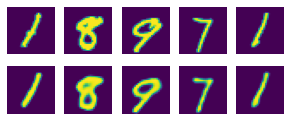

In [3]:
# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

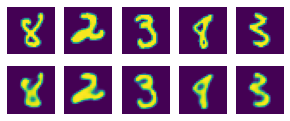

In [6]:
#학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  # 테스트 이미지를 불러오기 위한 random number
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기를 정합니다.

for i, image_idx in enumerate(random_test):  #랜덤하게 뽑은 이미지를 차례로 나열합니다.
   ax = plt.subplot(2, 7, i + 1) 
   plt.imshow(X_test[image_idx].reshape(28, 28))  #테스트할 이미지를 먼저 그대로 보여줍니다.
   ax.axis('off')
   ax = plt.subplot(2, 7, 7 + i +1)
   plt.imshow(ae_imgs[image_idx].reshape(28, 28))  #오토인코딩 결과를 다음열에 출력합니다.
   ax.axis('off')
plt.show()